In [2]:
# importing required lib
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
import missingno as mno
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

warnings.filterwarnings('ignore')

In [3]:
### Ques 1 -- Read the Titanic dataset and import all required libraries.
df = pd.read_csv('/Users/mohammadjuneidk/Downloads/Titanic.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1313 non-null   int64  
 1   Name        1313 non-null   object 
 2   PClass      1313 non-null   object 
 3   Age         756 non-null    float64
 4   Sex         1313 non-null   object 
 5   Survived    1313 non-null   int64  
 6   SexCode     1313 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 71.9+ KB


In [5]:
df.isna().sum()

Unnamed: 0      0
Name            0
PClass          0
Age           557
Sex             0
Survived        0
SexCode         0
dtype: int64

In [6]:
df.drop('Unnamed: 0',axis=1 ,inplace = True)
df

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
...,...,...,...,...,...,...
1308,"Zakarian, Mr Artun",3rd,27.00,male,0,0
1309,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0
1310,"Zenni, Mr Philip",3rd,22.00,male,0,0
1311,"Lievens, Mr Rene",3rd,24.00,male,0,0


In [7]:
df['Age'].fillna(df['Age'].mean(), inplace= True)
df

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
...,...,...,...,...,...,...
1308,"Zakarian, Mr Artun",3rd,27.00,male,0,0
1309,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0
1310,"Zenni, Mr Philip",3rd,22.00,male,0,0
1311,"Lievens, Mr Rene",3rd,24.00,male,0,0


In [8]:
df.isna().sum()

Name        0
PClass      0
Age         0
Sex         0
Survived    0
SexCode     0
dtype: int64

In [9]:
### Ques 2 -- Find out in the target column (survival) what is the respective count of values
df['Survived'].value_counts()

0    863
1    450
Name: Survived, dtype: int64

In [10]:
### Ques 3 -- Confirm through a chart that Women more likely survivied than Men
female = (df[(df['Survived'] == 1) & (df['SexCode'] == 1)])   # FILTERING THE DATAFRAME BY SURVIVED FEMALES 
male = (df[(df['Survived'] == 1) & (df['SexCode'] == 0)])     # FILTERING THE DATAFRAME BY SURVIVED MALE'S
print("Total Survived Females are :", female['Survived'].count())
print("Total Survived Male's are :", male['Survived'].count())

Total Survived Females are : 308
Total Survived Male's are : 142


<AxesSubplot:xlabel='Sex', ylabel='count'>

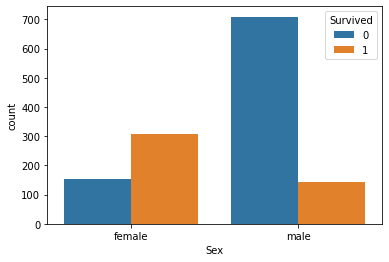

In [11]:
sns.countplot(x='Sex', data=df, hue='Survived')

In [12]:
fig = px.pie(df, values='Survived', names='Sex', title='Survived',color_discrete_sequence=px.colors.sequential.Turbo,hole=0.4)
fig.update_traces(textposition='inside', textfont_size=15)
fig.update_layout(autosize=False,
                  width=1000,
                  height=500,
                  template = "plotly_dark",
                  uniformtext_mode='hide',
                  legend=dict(
                  yanchor="top",
                  xanchor="right",
                  x=0,
                  y=1,
                  traceorder="normal",
                  title_font_family="Times New Roman",
                  font=dict(
                  family="Courier",
                  size=15,
                  color="black" ),
                  bgcolor="seashell",
                  bordercolor="slateblue",
                  borderwidth=2
    )
                )

fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)  


fig.show()

In [13]:
fig = px.bar(df, x="Sex", y="Survived",
              orientation='v',
             color="Sex"

    )
fig.update_layout(title="Total Survived Male and Females",
                  autosize=False,
                  width=1000,
                  height=500,
                  template = "presentation",
                  uniformtext_mode='hide',
     
                )

fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)  
#fig.update_layout(hovermode="x unified")

fig.show()



In [14]:
fig = px.imshow(df.corr(method='pearson'), 
                title='Correlations Among Training Features',
                height=700, width=700)
fig.show()

### as  there is one row which has non numeric so now we will drop that row

In [15]:
df[df['PClass']== '*']

,Name,PClass,Age,Sex,Survived,SexCode
456,Jacobsohn Mr Samuel,*,30.397989,male,0,0


In [16]:
df.drop([456], axis=0, inplace=True)
df[df['PClass']== '*']

,Name,PClass,Age,Sex,Survived,SexCode


In [17]:
df.reset_index(inplace= True)

In [18]:
df

,index,Name,PClass,Age,Sex,Survived,SexCode
0,0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
...,...,...,...,...,...,...,...
1307,1308,"Zakarian, Mr Artun",3rd,27.00,male,0,0
1308,1309,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0
1309,1310,"Zenni, Mr Philip",3rd,22.00,male,0,0
1310,1311,"Lievens, Mr Rene",3rd,24.00,male,0,0


In [19]:
### Ques 4 -- Confirm through a chart that a person aboarded with more than 2 siblings or spouse more likely survive

new = df["Name"].str.split(" ", n = 1, expand = True)

In [20]:
df['last_name'] = new[0]

In [21]:
g1 = (df.groupby (['last_name', 'PClass']).size().reset_index(name='count')).values
# Calculating the number of siblings for each person on the ship #
for i in range (df.shape[0]):
    for j in range (g1.shape[0]) :
        if df.loc[i, 'last_name']==g1[j][0] and df.loc[i, 'PClass']==g1[j][1]:
            df.loc[i,'Sibsp']=g1[j][2]-1


In [22]:
df

,index,Name,PClass,Age,Sex,Survived,SexCode,last_name,Sibsp
0,0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1,"Allen,",0.0
1,1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1,"Allison,",3.0
2,2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0,"Allison,",3.0
3,3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1,"Allison,",3.0
4,4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0,"Allison,",3.0
...,...,...,...,...,...,...,...,...,...
1307,1308,"Zakarian, Mr Artun",3rd,27.00,male,0,0,"Zakarian,",1.0
1308,1309,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0,"Zakarian,",1.0
1309,1310,"Zenni, Mr Philip",3rd,22.00,male,0,0,"Zenni,",0.0
1310,1311,"Lievens, Mr Rene",3rd,24.00,male,0,0,"Lievens,",0.0


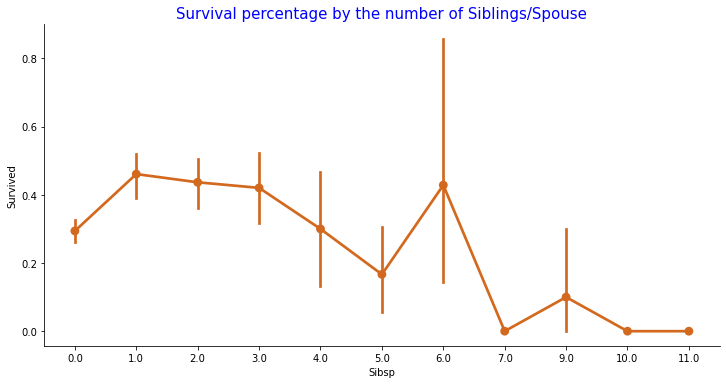

In [23]:
fig = sns.catplot (data=df, x ='Sibsp', y='Survived', kind='point' ,aspect=2, color='chocolate')

plt. title('Survival percentage by the number of Siblings/Spouse', fontsize=15, c='b')
plt. show()

In [24]:
df['PClass'].value_counts()

3rd    711
1st    322
2nd    279
Name: PClass, dtype: int64

In [25]:
### Ques 5 -- Write code to convert categorical columns to equivalent dummy variables
df.replace({'Sex':{'female': 1, 'male' : 0},'PClass': {'1st':1,'2nd': 2, '3rd':3 }}, inplace= True)

In [26]:
df

,index,Name,PClass,Age,Sex,Survived,SexCode,last_name,Sibsp
0,0,"Allen, Miss Elisabeth Walton",1,29.00,1,1,1,"Allen,",0.0
1,1,"Allison, Miss Helen Loraine",1,2.00,1,0,1,"Allison,",3.0
2,2,"Allison, Mr Hudson Joshua Creighton",1,30.00,0,0,0,"Allison,",3.0
3,3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1,25.00,1,0,1,"Allison,",3.0
4,4,"Allison, Master Hudson Trevor",1,0.92,0,1,0,"Allison,",3.0
...,...,...,...,...,...,...,...,...,...
1307,1308,"Zakarian, Mr Artun",3,27.00,0,0,0,"Zakarian,",1.0
1308,1309,"Zakarian, Mr Maprieder",3,26.00,0,0,0,"Zakarian,",1.0
1309,1310,"Zenni, Mr Philip",3,22.00,0,0,0,"Zenni,",0.0
1310,1311,"Lievens, Mr Rene",3,24.00,0,0,0,"Lievens,",0.0


In [27]:
df['PClass']=df['PClass'].astype('float')

In [28]:
### Ques 6 -- Perform predictions on the Test dataset

# splitting the data into features and target
X = df.drop(columns=['Name','Survived','last_name','Sibsp','index'], axis=1)
y = df['Survived']

In [29]:
# splitting the dataset in to train and test
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify = y, random_state= 0 )

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(1312, 4) (918, 4) (394, 4)


In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [32]:
### Ques 7 -- Create the confusion matrix
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, lr_yhat)
print(cf_matrix)

[[245  14]
 [ 60  75]]


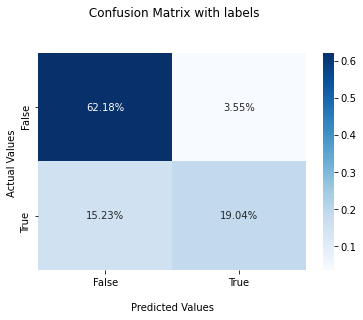

In [33]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [34]:
### Ques 8 -- Find the accuracy of your model
# printing the accuracy of the model
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))
print("*"* 100)
from sklearn.metrics import classification_report
print("-"* 20,"Classification Report","-"* 20)
print(classification_report(y_test, lr_yhat))

Accuracy score of the Logistic Regression model is 0.8121827411167513
F1 score of the Logistic Regression model is 0.6696428571428572
****************************************************************************************************
-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       259
           1       0.84      0.56      0.67       135

    accuracy                           0.81       394
   macro avg       0.82      0.75      0.77       394
weighted avg       0.82      0.81      0.80       394



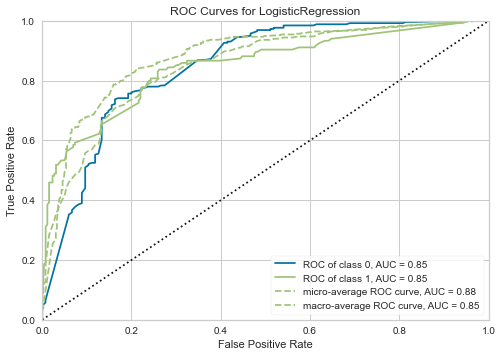

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [35]:
# assigning classes
classes = ['0', '1']
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(lr, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()  

### Plotting ROC Curve by using plotly

In [36]:
from sklearn.metrics import roc_curve, auc

In [37]:
y_score = lr.predict_proba(X)[:, 1]

In [38]:
fpr, tpr, thresholds = roc_curve(y, y_score)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=1000, height=500
)

fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.update_layout(
                  autosize=False,
                  width=1000,
                  height=500,
                  template = "plotly_dark",   # ----> you can change the themes 
                  #uniformtext_mode='hide',
     
                )
fig.show()

In [41]:
df.columns

Index(['index', 'Name', 'PClass', 'Age', 'Sex', 'Survived', 'SexCode',
       'last_name', 'Sibsp'],
      dtype='object')

In [52]:
#female = (df[(df['Survived'] == 1) & (df['SexCode'] == 1)])   # FILTERING THE DATAFRAME BY SURVIVED FEMALES 
#male = (df[(df['Survived'] == 1) & (df['SexCode'] == 0)])  
sur = (df[(df['Survived'] == 1)])
sur.drop('index',axis=1,inplace=True)

In [53]:
sur.head()

,Name,PClass,Age,Sex,Survived,SexCode,last_name,Sibsp
0,"Allen, Miss Elisabeth Walton",1.0,29.00,1,1,1,"Allen,",0.0
4,"Allison, Master Hudson Trevor",1.0,0.92,0,1,0,"Allison,",3.0
5,"Anderson, Mr Harry",1.0,47.00,0,1,0,"Anderson,",0.0
6,"Andrews, Miss Kornelia Theodosia",1.0,63.00,1,1,1,"Andrews,",1.0
8,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1.0,58.00,1,1,1,"Appleton,",0.0


In [54]:
# some more visualization
fig = px.scatter(sur, y='Age', color='Survived', size='Sex')
fig.show()


In [55]:
fig = px.histogram(df, x='Age', nbins=50, histnorm='probability density')
fig.show()